In [8]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [2]:
data_no_outliers = pd.read_parquet('data/data_no_outliers.parquet')

data_no_outliers

,cat_onehot__default_yes,cat_onehot__housing_yes,cat_onehot__loan_yes,cat_onehot__job_blue-collar,cat_onehot__job_entrepreneur,cat_onehot__job_housemaid,cat_onehot__job_management,cat_onehot__job_retired,cat_onehot__job_self-employed,cat_onehot__job_services,cat_onehot__job_student,cat_onehot__job_technician,cat_onehot__job_unemployed,cat_onehot__job_unknown,cat_onehot__marital_married,cat_onehot__marital_single,cat_ordinal__education,num__age,num__balance
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.473637,0.414773
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.429379,-0.410774
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.709873,-0.431122
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.683128,0.197685
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,-0.472563,-0.302591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.589198,-0.159379
40686,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.859071,-0.181020
40687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.993503,-0.052398
40688,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.409327,-0.114235


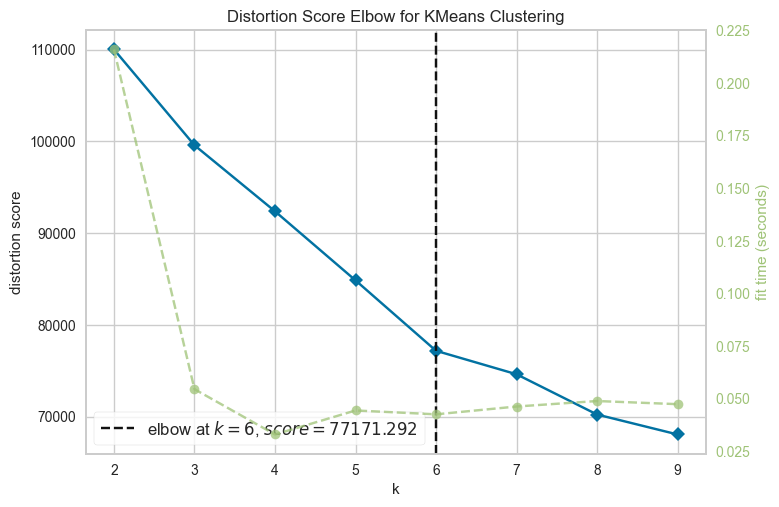

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:


# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(data_no_outliers)        # Fit the data to the visualizer
visualizer.show()    

In [9]:
def make_Silhouette_plot(X, n_clusters):
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        plt.title(f"The Silhouette Plot for n_cluster = {n_clusters}", fontsize=26)
        plt.xlabel("The silhouette coefficient values", fontsize=24)
        plt.ylabel("Cluster label", fontsize=24)
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.yticks([])  
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [10]:
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    print(f"N cluster: {n_clusters}")
    make_Silhouette_plot(data_no_outliers, n_clusters)   
    plt.savefig('data/Silhouette_plot_{}.png'.format(n_clusters))
    plt.close()

N cluster: 2
For n_clusters = 2 The average silhouette_score is : 0.1811128736615935
N cluster: 3
For n_clusters = 3 The average silhouette_score is : 0.16787543108039427
N cluster: 4
For n_clusters = 4 The average silhouette_score is : 0.15834119588814663
N cluster: 5
For n_clusters = 5 The average silhouette_score is : 0.16729872600533727
N cluster: 6
For n_clusters = 6 The average silhouette_score is : 0.15485098506268669
N cluster: 7
For n_clusters = 7 The average silhouette_score is : 0.14953076421833594
N cluster: 8
For n_clusters = 8 The average silhouette_score is : 0.15098396457091448
N cluster: 9
For n_clusters = 9 The average silhouette_score is : 0.14842917303556125


In [11]:
km = KMeans(
    n_clusters=5,
    init='k-means++', 
    n_init=10,
    max_iter=100, 
    random_state=42,
)

clusters_predict = km.fit_predict(data_no_outliers)

In [21]:
np.savez_compressed('data/clusters_predict', clusters_predict)

In [22]:
np.load('data/clusters_predict.npz')['arr_0']

array([0, 2, 1, ..., 0, 4, 1])